# Erklärung $R^2$

In [87]:
# Bessere Darstellung der Abbildungen
library(repr)
options(repr.plot.width=10, repr.plot.height=6)

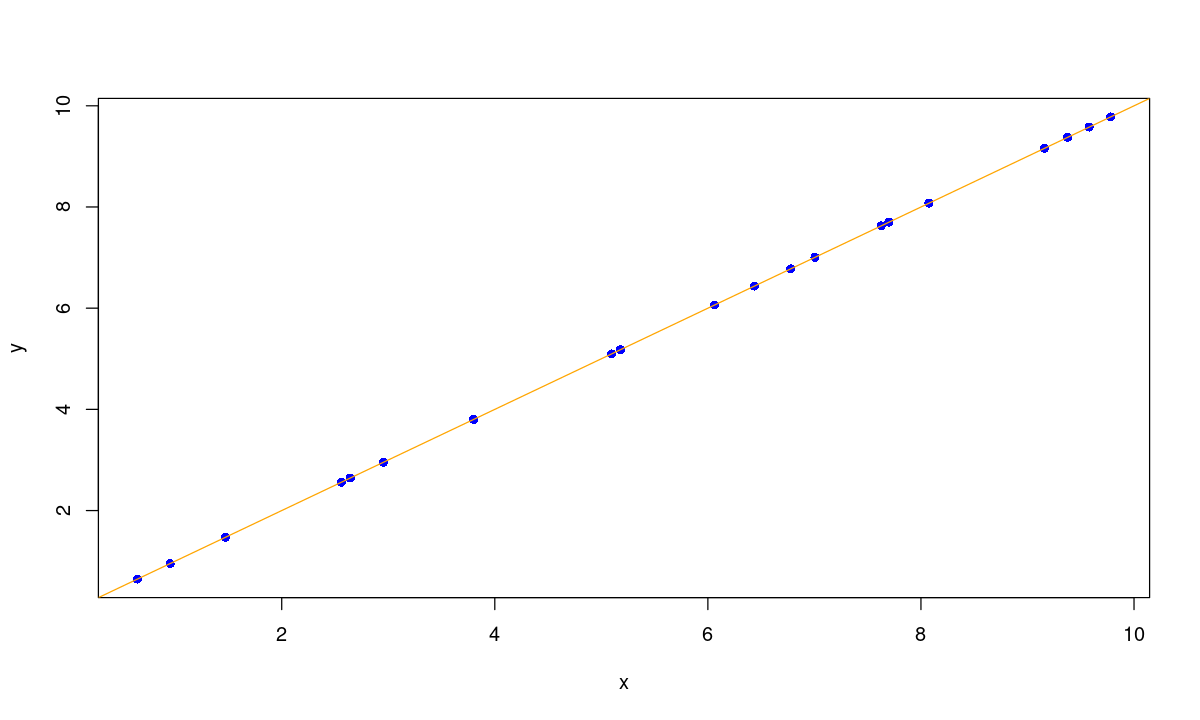

In [25]:
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x
plot(x, y, col="blue", pch=16)
abline(lm(y~x), col="orange")

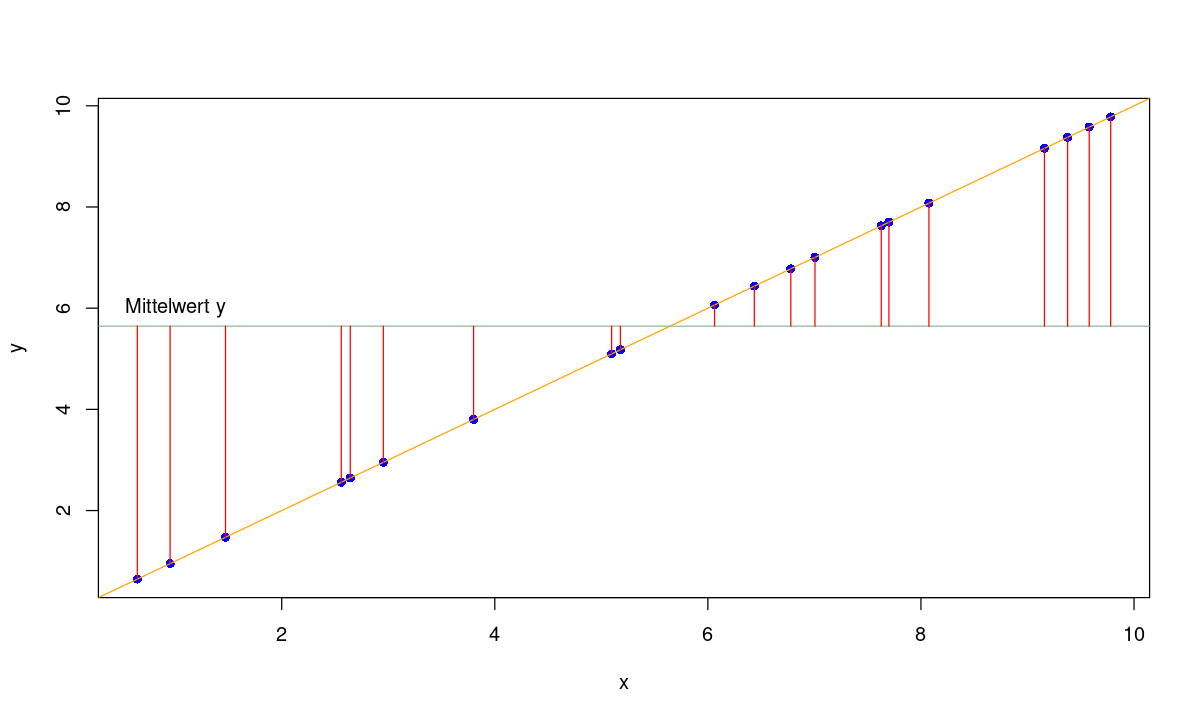

In [26]:
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x
plot(x, y, col="blue", pch=16)
abline(lm(y~x), col="orange")
abline(mean(y),0,col="darkseagreen")
for (i in 1:20)
{
lines(c(x[i],x[i]),c(x[i],mean(y)),col="red")
}
text(1,6,"Mittelwert y")

In [3]:
cor(x, y)
summary(lm(y~x))$r.squared
var(y)

[1] 1

Warning message in summary.lm(lm(y ~ x)):
“essentially perfect fit: summary may be unreliable”


[1] 1

[1] 8.998626

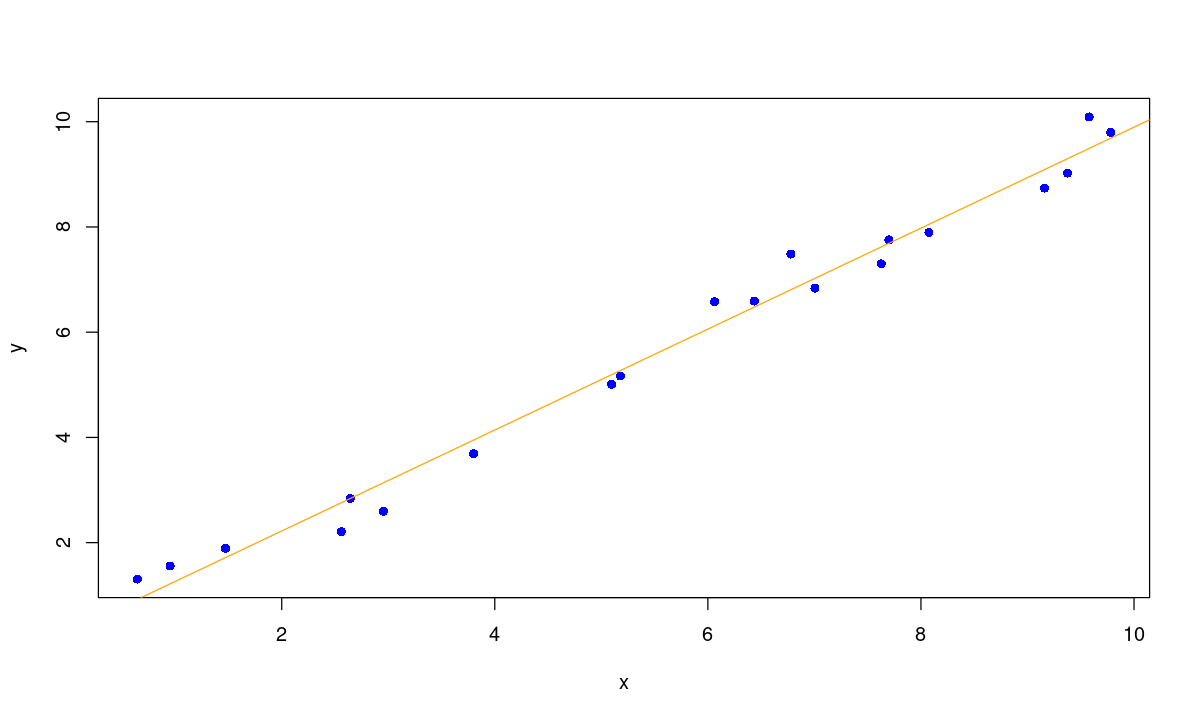

In [27]:
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=.3)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")

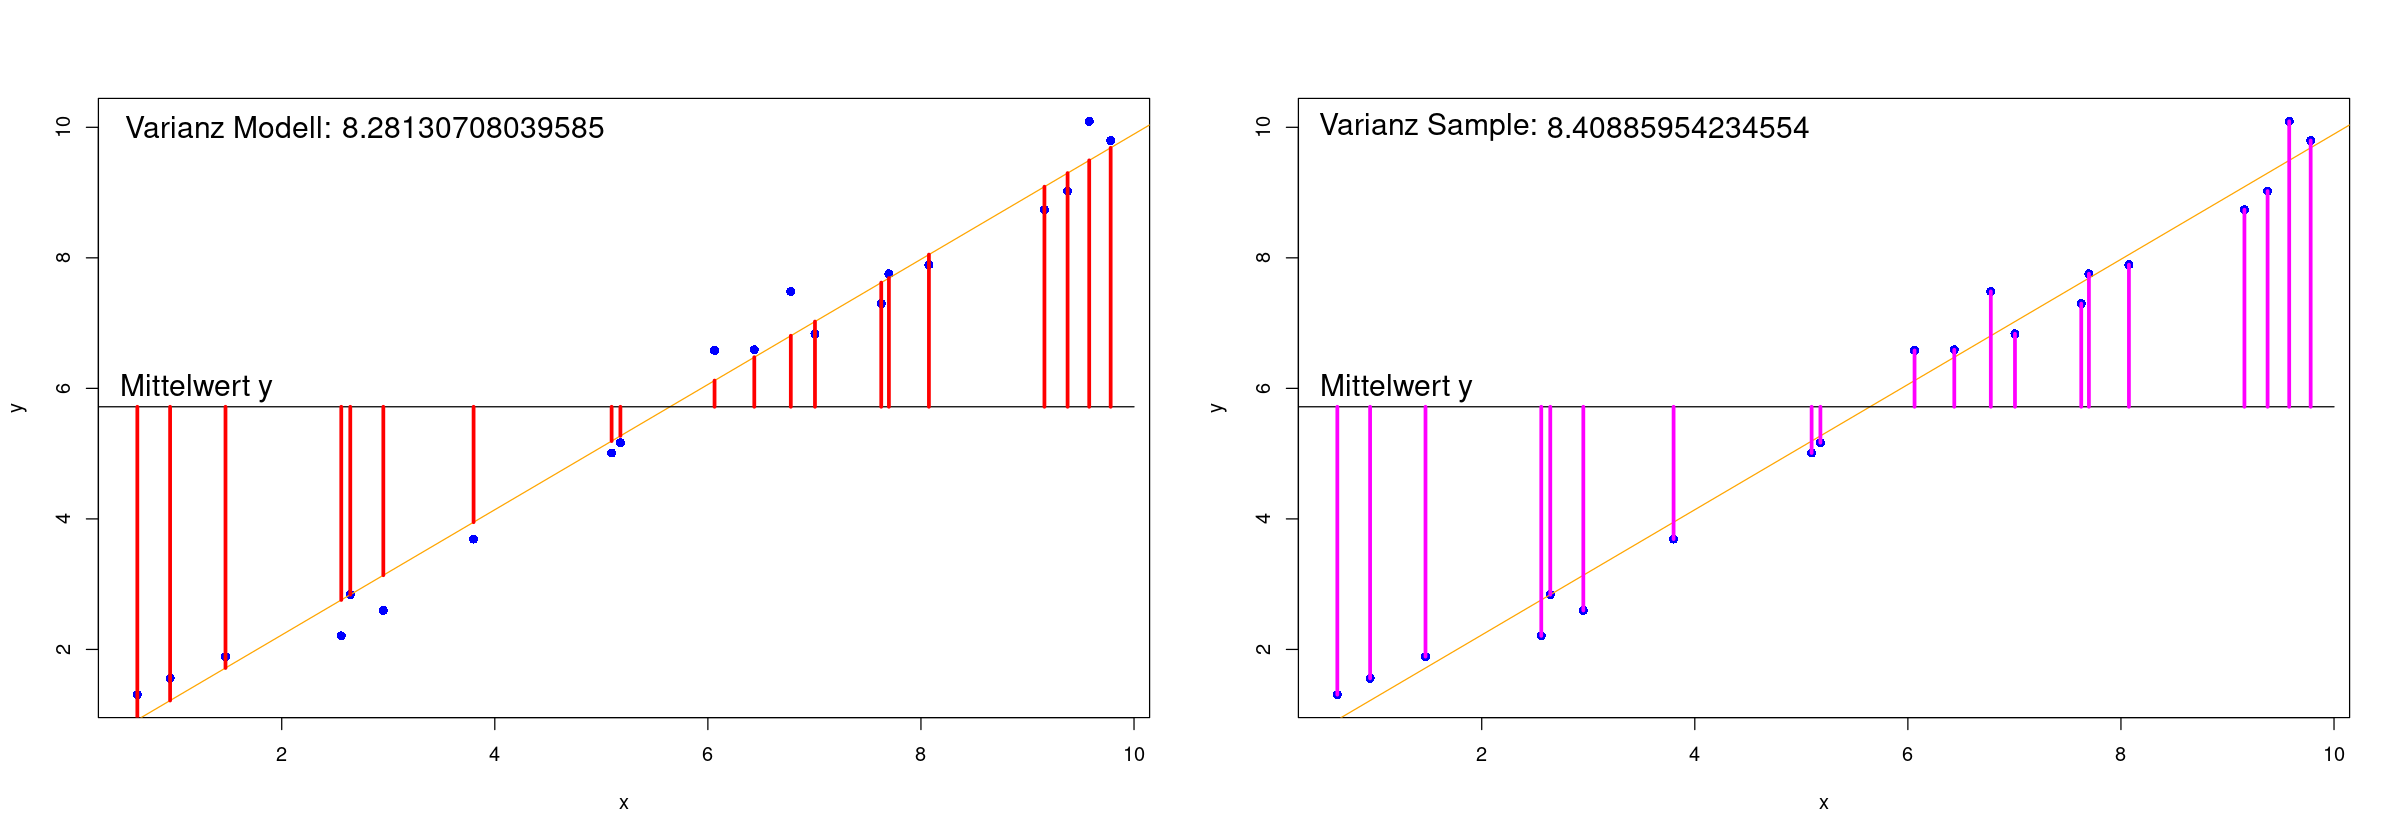

In [63]:
options(repr.plot.width=20, repr.plot.height=7)
par(mfrow=c(1,2))
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=.3)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))
for (i in 1:20)
{
  lines(c(x[i],x[i]),c(a+b*x[i],y.mean),col="red",lwd=3)
}
var.mod <- var(a+b*x)
text(1.5,10,"Varianz Modell:",cex=1.5)
text(3.8,10,var.mod,cex=1.5)
text(1.2,6,"Mittelwert y",cex=1.5)
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=.3)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))

for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],y.mean),col="magenta",lwd=3)
}
var.samp <- var(y)
text(1.5,10,"Varianz Sample:",cex=1.5)
text(3.85,10,var.samp,cex=1.5)
text(1.2,6,"Mittelwert y",cex=1.5)

$R^2$ ist definiert als $\frac{\text{Varianz Modell (var.mod)}}{\text{Varianz Sample (var.samp)}}$

In [58]:
var.mod/var.samp

summary(lm(y~x))$r.squared

[1] 0.9848312

[1] 0.9848312

Es gibt noch eine alternative Definition, die vielleicht ein bisschen klarer ist. 

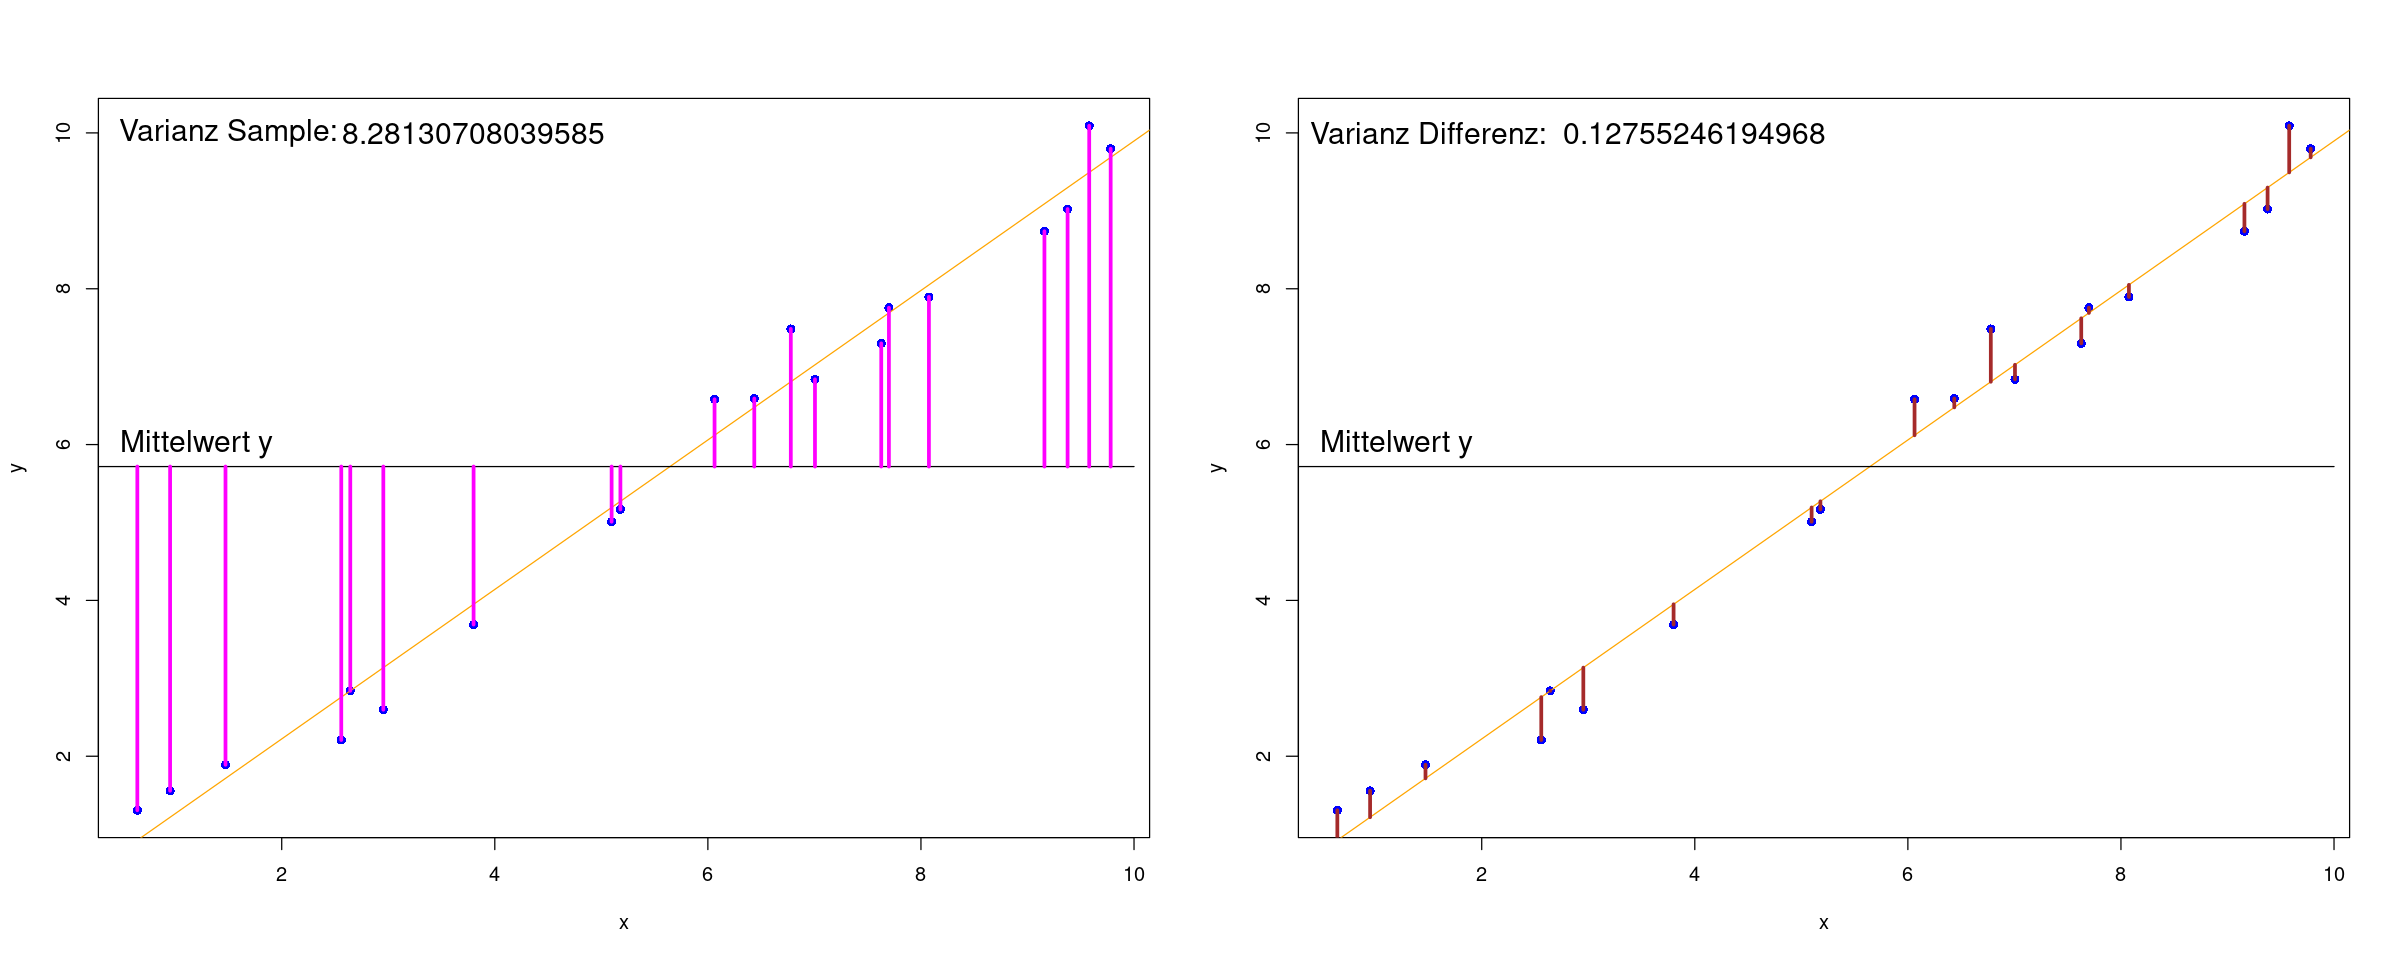

In [82]:
options(repr.plot.width=20, repr.plot.height=8)
par(mfrow=c(1,2))
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=.3)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))
for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],y.mean),col="magenta",lwd=3)
}
var.mod <- var(a+b*x)
text(1.5,10,"Varianz Sample:",cex=1.5)
text(3.8,10,var.mod,cex=1.5)
text(1.2,6,"Mittelwert y",cex=1.5)
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=.3)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))

for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],a+b*x[i]),col="brown",lwd=3)
}
var.dif <- var(y-(a+b*x))
text(1.5,10,"Varianz Differenz:",cex=1.5)
text(4,10,var.dif,cex=1.5)
text(1.2,6,"Mittelwert y",cex=1.5)

$R^2$ ist auch definiert als $1-\frac{\text{Varianz Differenz (var.dif)}}{\text{Varianz Sample (var.samp)}}$. 

Der Ausdruck $\frac{\text{Varianz Differenz (var.dif)}}{\text{Varianz Sample (var.samp)}}$ ist das Verhältnis der Varianz der Daten die nicht durch das Modell erklärt werden (rechts) durch die Varianz der Daten (links).

Wir können also $R^2$ definieren als das Verhältnis der Varianz der Daten, das durch das Modell erklärt wird. 

In [70]:
1- var.dif/var.samp

summary(lm(y~x))$r.squared

[1] 0.9848312

[1] 0.9848312

Die Varianz auf der rechten Seite ist klein und damit auch $\frac{\text{Varianz Differenz (var.dif)}}{\text{Varianz Sample (var.samp)}}$ sehr nahe bei 0. Und damit ist $R^2$ nahe bei 1, wenn die Punkte gut zu dem Modell passen. 

Im folgenden Fall passen die Punkte nicht gut zu der Geraden.

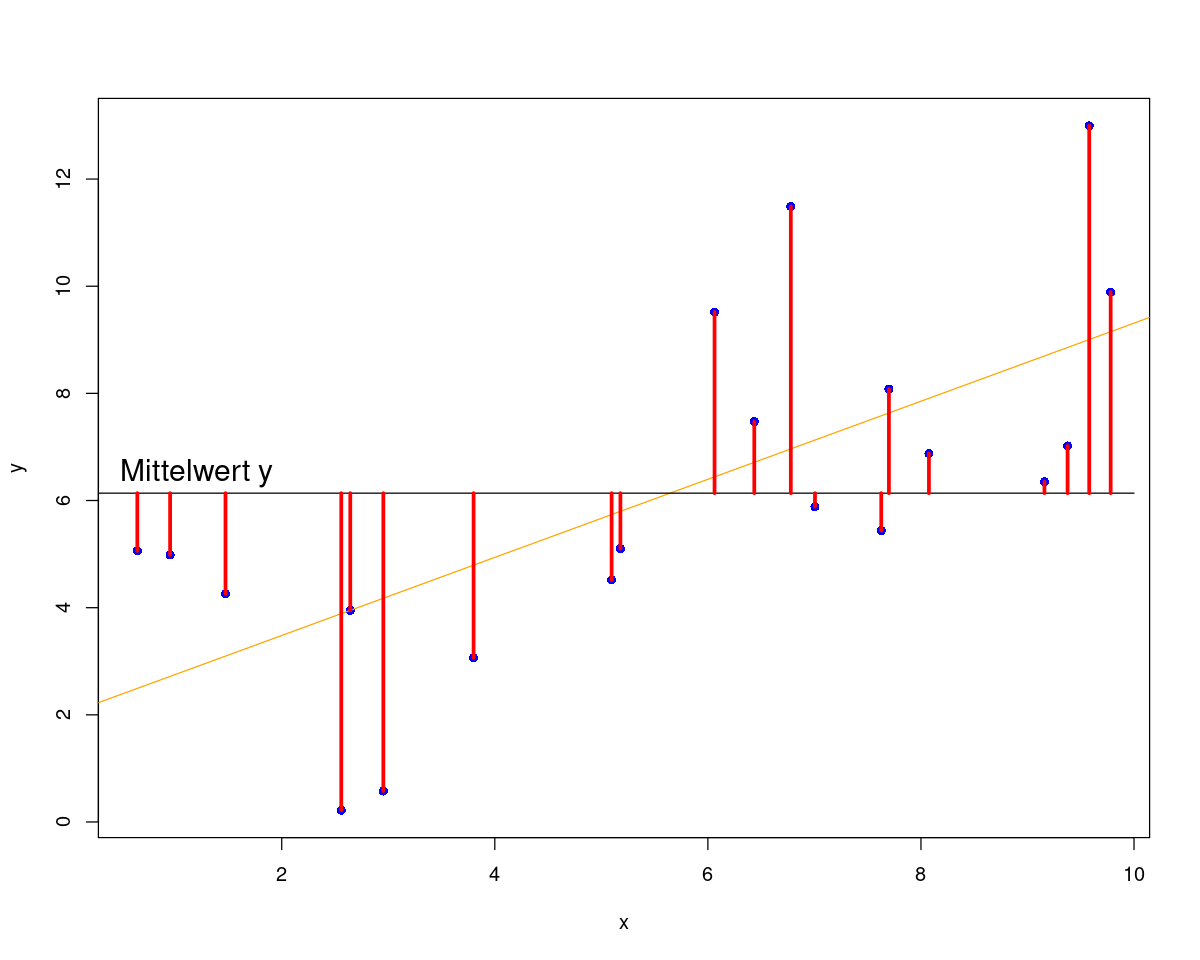

In [79]:
options(repr.plot.width=10, repr.plot.height=8)
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=2)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))
for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],y.mean),col="red",lwd=3)
}
text(1.2,6.5,"Mittelwert y",cex=1.5)

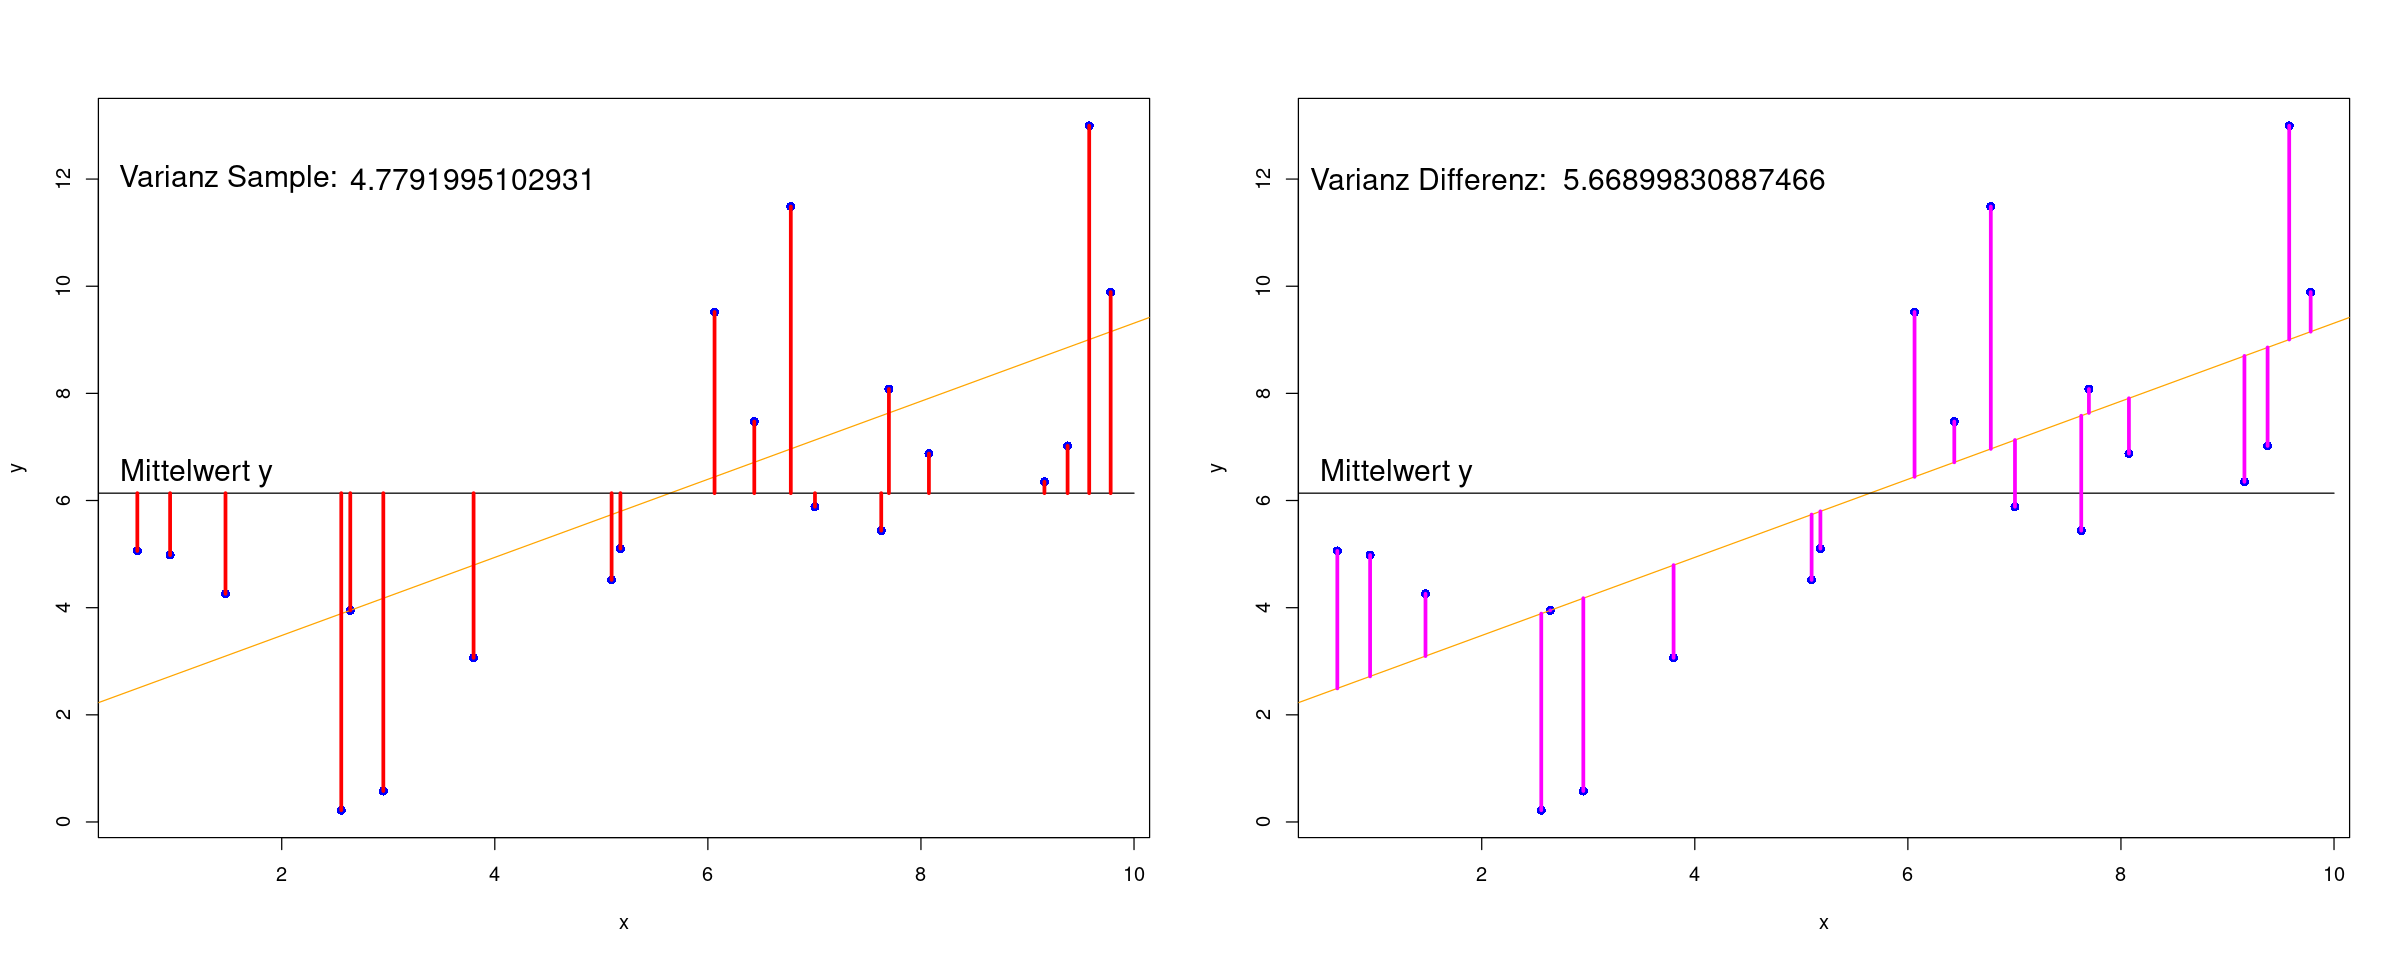

In [80]:
options(repr.plot.width=20, repr.plot.height=8)
par(mfrow=c(1,2))
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=2)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))
for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],y.mean),col="magenta",lwd=3)
}
var.mod <- var(a+b*x)
text(1.5,12,"Varianz Sample:",cex=1.5)
text(3.8,12,var.samp,cex=1.5)
text(1.2,6.5,"Mittelwert y",cex=1.5)
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=2)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))

for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],a+b*x[i]),col="brown",lwd=3)
}
var.dif <- var(y-(a+b*x))
var.samp <- var(y)

text(1.5,12,"Varianz Differenz:",cex=1.5)
text(4,12,var.dif,cex=1.5)
text(1.2,6.5,"Mittelwert y",cex=1.5)

In [75]:
1 - var.dif/var.samp

summary(lm(y~x))$r.squared

[1] 0.4574186

[1] 0.4574186

Die braunen Linien sind nun auf der rechten Seite grösser geworden und somit auch $\frac{\text{Varianz Differenz (var.dif)}}{\text{Varianz Sample (var.samp)}}$. Das heisst, $R^2$ ist nun nicht mehr nahe bei.

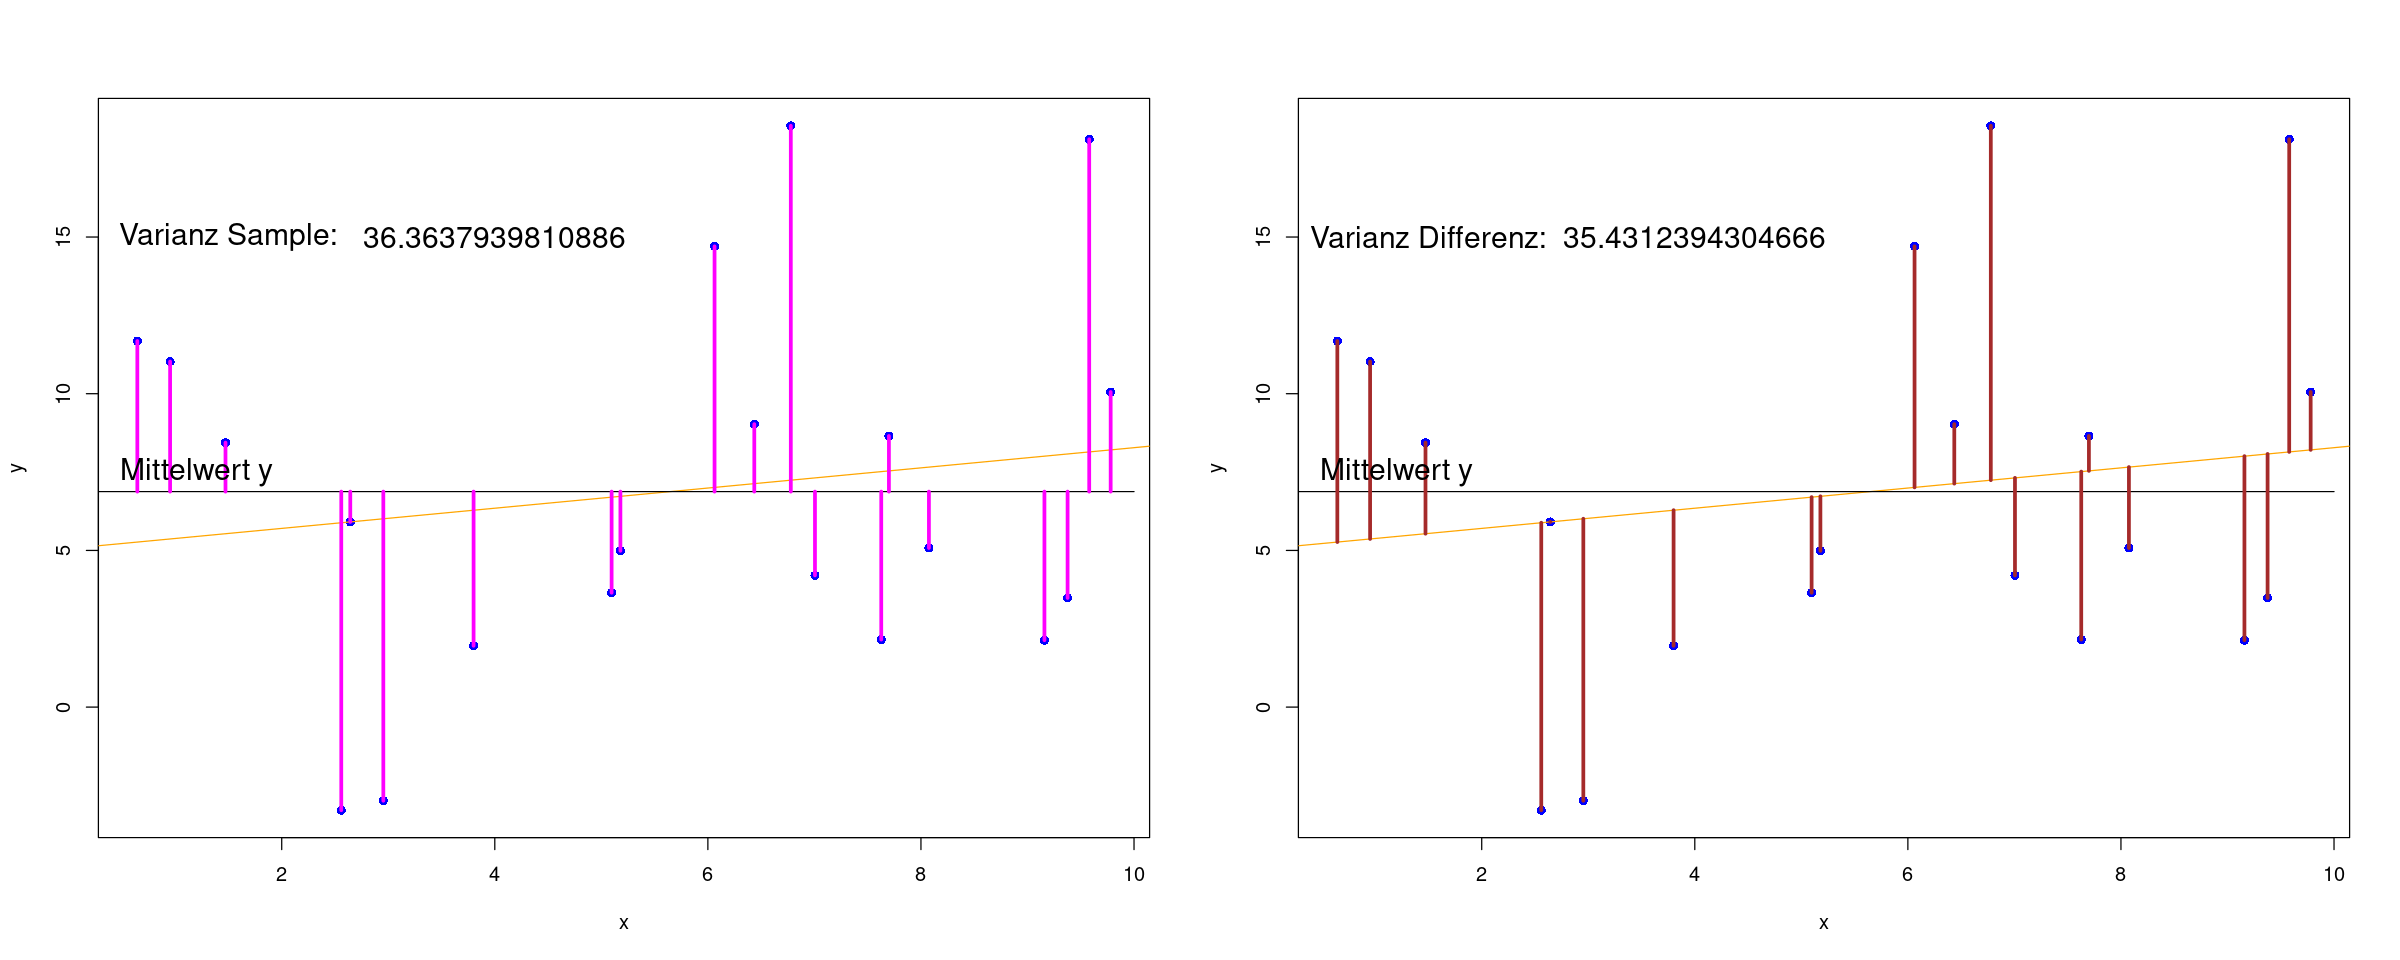

In [90]:
options(repr.plot.width=20, repr.plot.height=8)
par(mfrow=c(1,2))
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=5)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))
for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],y.mean),col="magenta",lwd=3)
}
var.mod <- var(a+b*x)
text(1.5,15,"Varianz Sample:",cex=1.5)
text(4,15,var.samp,cex=1.5)
text(1.2,7.5,"Mittelwert y",cex=1.5)
set.seed(6)
x <- runif(min=0, max=10, n=20)
y <- x + rnorm(n=20, mean=0, sd=5)
plot(x,y, col="blue", pch=16)
abline(lm(y~x), col="orange")
y.mean <- mean(y)
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]
lines(c(0,10),c(y.mean, y.mean))

for (i in 1:20)
{
  lines(c(x[i],x[i]),c(y[i],a+b*x[i]),col="brown",lwd=3)
}
var.dif <- var(y-(a+b*x))
var.samp <- var(y)

text(1.5,15,"Varianz Differenz:",cex=1.5)
text(4,15,var.dif,cex=1.5)
text(1.2,7.5,"Mittelwert y",cex=1.5)

In [84]:
1 - var.dif/var.samp

summary(lm(y~x))$r.squared

[1] 0.02564514

[1] 0.02564514

Die braunen Linien sind nun auf der rechten Seite fast gleich wie die pinken auf der linken Seite und somit auch $\frac{\text{Varianz Differenz (var.dif)}}{\text{Varianz Sample (var.samp)}}$ fast 1. Das heisst, $R^2$ ist nun praktisch 0.

Ist also $R^2$ nahe bei 1, so passt das Modell gut zu den Punkten. Ist $R^2$ nahe bei 0, so passt das Modell nicht zu den Daten. 